In [2]:
#average learning
#bagging method

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging=BaggingClassifier(KNeighborsClassifier(),max_samples=.5,max_features=.5)


In [3]:
#hard voting(majority vote)

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris=load_iris()
x,y=iris.data[:,[2,3]],iris.target

clf1=LogisticRegression(solver='lbfgs')
clf2=GaussianNB()
clf3=RandomForestClassifier(n_estimators=50,random_state=42)
vclf=VotingClassifier(estimators=[('lr',clf1),('gnb',clf2),('rf',clf3)],voting='hard')

for clf,label in zip([clf1,clf2,clf3,vclf],['Logistic Regression','Gaussian Naive Bayes','Random Forest','Ensemble']):
    score=cross_val_score(clf,x,y,cv=5,scoring='accuracy')
    print('Accuracy: {:.2f} (+/- {:.2f}) [{}]'.format(score.mean(),score.std(),label))

Accuracy: 0.96 (+/- 0.02) [Logistic Regression]
Accuracy: 0.96 (+/- 0.02) [Gaussian Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [Random Forest]
Accuracy: 0.96 (+/- 0.02) [Ensemble]


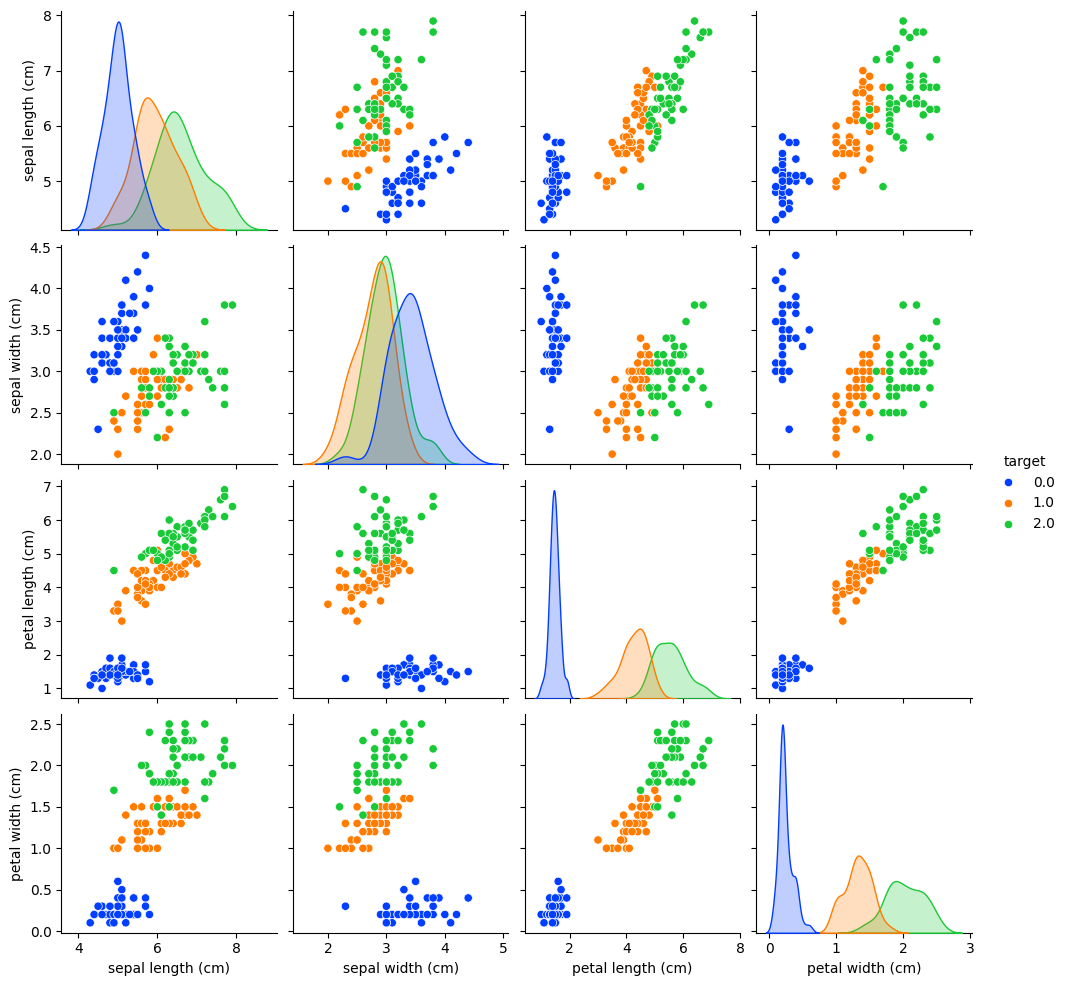

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

iris_df=pd.DataFrame(np.c_[iris.data,iris.target],columns=iris.feature_names+['target'])

sb.pairplot(iris_df,hue='target',kind='scatter',palette='bright')

In [ ]:
iris_df

In [ ]:
np.c_[iris.data,iris.target]

In [ ]:
iris.feature_names+['target']

In [ ]:
iris_df.target

In [ ]:
iris_df['target']

In [ ]:
iris_df.values[:,-1]

In [ ]:
iris_df.columns[-1]

In [5]:
sb.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

Accuracy:0.96   (+/- 0.02) [K Nearest Neighbors]
Accuracy:0.95   (+/- 0.03) [Decision Tree]
Accuracy:0.97   (+/- 0.02) [Support Vector Machine]
Accuracy:0.97   (+/- 0.02) [Ensemble]


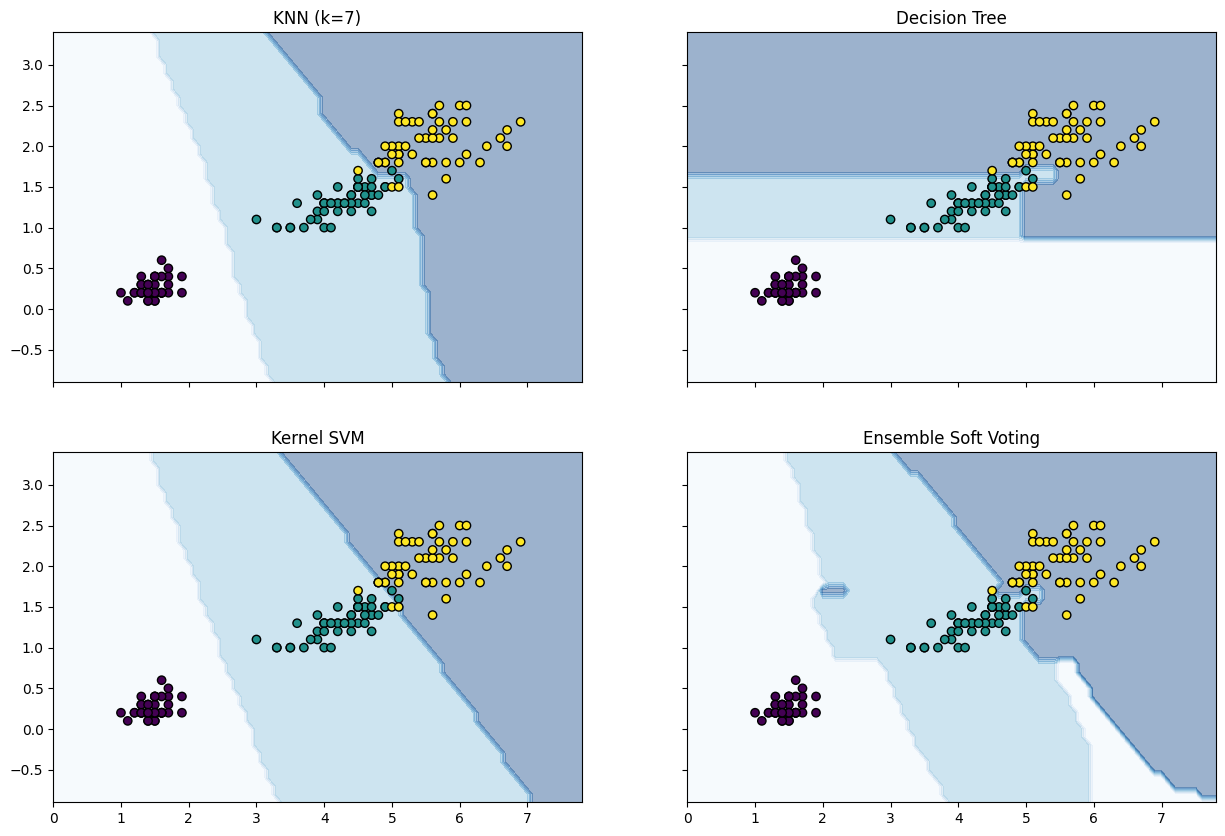

In [109]:
#soft voting
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris=load_iris()
x=iris.data[:,[2,3]]
y=iris.target

clf1=KNeighborsClassifier(n_neighbors=7,)
clf2=DecisionTreeClassifier()
clf3=SVC(kernel='rbf',gamma=.1,probability=True,)
vclf=VotingClassifier(estimators=[('knn',clf1),('dt',clf2),('svc',clf3)],voting='soft',weights=[1,2,2])

for label,clf in [('K Nearest Neighbors',clf1),('Decision Tree',clf2),('Support Vector Machine',clf3),('Ensemble',vclf)]:
    score=cross_val_score(clf,x,y,scoring='accuracy')
    print("Accuracy:{:.2f}   (+/- {:.2f}) [{}]".format(score.mean(),score.std(),label))
    
clf1.fit(x,y)
clf2.fit(x,y)
clf3.fit(x,y)
vclf.fit(x,y)
    
#plotting decision regions
x_min, x_max=x[:,0].min()-1, x[:,0].max()+1
y_min, y_max=x[:,1].min()-1, x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.1),np.arange(y_min,y_max,.1))

fig,axs= plt.subplots(2,2,sharex='col',sharey='row',figsize=(15,10),)

for idx,clf,label in zip(product([0,1],[0,1]),
                        [clf1,clf2,clf3,vclf],
                        ['KNN (k=7)','Decision Tree','Kernel SVM','Ensemble Soft Voting']):
    
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    
    axs[idx].contourf(xx,yy,z,cmap=plt.cm.Blues,alpha=.4,)
    axs[idx].scatter(x[:,0],x[:,1],c=y,edgecolor='k',)
    axs[idx].set_title(label)

In [ ]:
list(product([0,1],[0,1]))

In [115]:
#voting regressor

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

x,y=fetch_california_housing(return_X_y=True)

#training regressors
reg1=LinearRegression().fit(x,y)
reg2=RandomForestRegressor().fit(x,y)
reg3=GradientBoostingRegressor().fit(x,y)
vreg=VotingRegressor([('lr',reg1),('rf',reg2),('gb',reg3)]).fit(x,y)




Text(0.5, 1.0, 'Comarison of individual predictions with average')

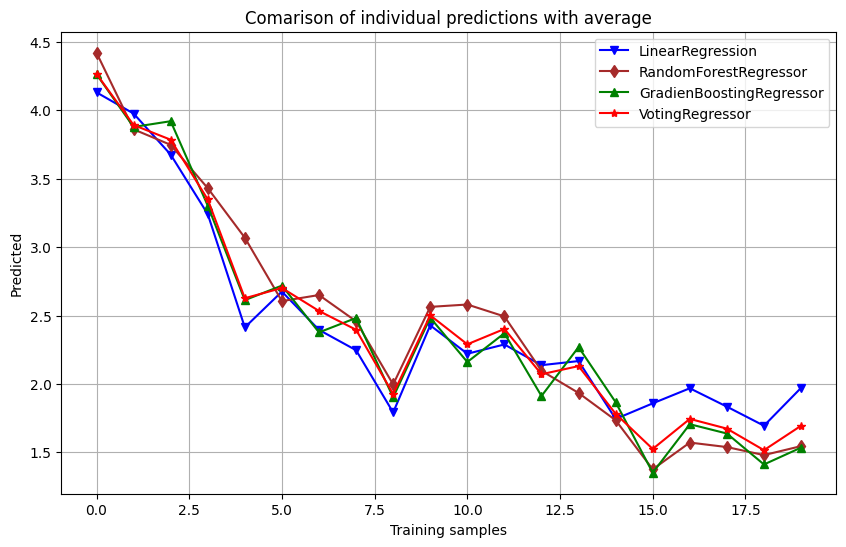

In [175]:
plt.figure(figsize=(10,6))
plt.plot(reg1.predict(x[:20]),'bv-',label='LinearRegression')
plt.plot(reg2.predict(x[:20]),c='brown',marker='d',ls='-',label='RandomForestRegressor')
plt.plot(reg3.predict(x[:20]),'g^-',label='GradienBoostingRegressor')
plt.plot(vreg.predict(x[:20]),'r*-',label='VotingRegressor')

plt.grid()
plt.legend()
plt.xlabel('Training samples')
plt.ylabel('Predicted')
plt.title('Comarison of individual predictions with average')
#plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

In [117]:
x.shape

(20640, 8)

In [118]:
y.shape

(20640,)

In [119]:
reg1.predict(x[:20]).shape

(20,)

In [120]:
x[:20].shape

(20, 8)

In [121]:
range(len(reg1.predict(x[:20])))

range(0, 20)

In [168]:
y.min()

0.14999

In [169]:
y.max()

5.00001

In [203]:
#Boost methods
#AdaBoost

from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection  import cross_val_score

x,y=load_iris(return_X_y=True)
clf=AdaBoostClassifier(n_estimators=100,algorithm='SAMME',)
score=cross_val_score(clf,x,y,cv=5)

score.mean()


0.9533333333333334

In [260]:
#Gradient Tree Boosting

import pandas as pd
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

x,y=make_hastie_10_2(random_state=0)
x_train,x_test=x[:10000],x[10000:]
y_train,y_test=y[:10000],y[10000:]

clf=GradientBoostingClassifier(n_estimators=100,learning_rate=1,max_depth=1,verbose=True,random_state=0).fit(x_train,y_train)
clf.score(x_test,y_test)

      Iter       Train Loss   Remaining Time 
         1           1.3573            2.66s
         2           1.3294            2.35s
         3           1.3032            2.12s
         4           1.2746            1.99s
         5           1.2463            1.94s
         6           1.2195            1.87s
         7           1.1892            1.84s
         8           1.1619            1.80s
         9           1.1350            1.78s
        10           1.1069            1.74s
        20           0.8112            1.50s
        30           0.7065            1.34s
        40           0.6167            1.17s
        50           0.5392            0.98s
        60           0.4700            0.79s
        70           0.4314            0.59s
        80           0.3981            0.39s
        90           0.3686            0.20s
       100           0.3436            0.00s


0.922

In [230]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.105220,-0.473770,1.736531,-0.081896,-1.215359,0.121887,0.719251,-0.314570,0.514169,0.490768
1,-1.428697,1.001410,-2.071128,0.176457,-0.753803,1.993499,-0.689815,-0.642919,0.029565,-0.451785
2,1.327535,1.715104,0.702226,-0.142632,-0.649286,1.148151,1.540912,-0.898045,-0.245854,-0.082834
3,-0.565004,-0.306580,-0.151293,0.939739,-0.973647,-1.836964,2.171944,1.065487,-1.248758,0.428419
4,0.443498,-1.536298,0.326491,-0.154802,-0.693399,1.706159,0.017582,-0.769730,0.718399,-0.857350
...,...,...,...,...,...,...,...,...,...,...
11995,-1.144313,0.347692,0.513456,0.258960,-0.798498,-0.675656,0.924834,0.610669,-0.475828,1.697198
11996,0.770363,0.263068,-1.105687,-0.236427,0.913358,0.999065,0.553576,-1.664252,-0.285790,-0.262230
11997,0.628587,-2.632639,0.186888,-0.032208,-0.144442,-0.153935,-1.443809,-1.858495,-0.332692,1.798766
11998,1.445012,0.242191,-1.340952,1.672872,-1.035385,-0.002516,-0.477661,-0.999943,-1.306360,0.584058


In [361]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

x,y=make_friedman1(n_samples=10000,n_features=10,noise=0,random_state=40)
x_train,x_test=x[:8000],x[8000:]
y_train,y_test=y[:8000],y[8000:]

reg=GradientBoostingRegressor(n_estimators=200,learning_rate=.1,max_depth=5,random_state=44,verbose=True).fit(x_train,y_train)
print(f'Accuracy: {reg.score(x_test,y_test)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,reg.predict(x_test))}')

      Iter       Train Loss   Remaining Time 
         1          20.0929           14.83s
         2          17.3456           13.23s
         3          15.0414           12.67s
         4          13.1366           12.68s
         5          11.4968           12.40s
         6          10.1446           12.38s
         7           8.9909           12.84s
         8           7.9932           13.62s
         9           7.1664           13.76s
        10           6.4345           13.89s
        20           2.6647           14.00s
        30           1.3189           12.91s
        40           0.7189           11.91s
        50           0.4535           10.98s
        60           0.3103           10.08s
        70           0.2430            9.41s
        80           0.1936            8.55s
        90           0.1587            7.80s
       100           0.1416            7.03s
       200           0.0712            0.00s
Accuracy: 0.992461652336094
Mean Squared Error: 0.1809

In [291]:
x.shape

(1000, 10)

In [292]:
y.shape

(1000,)

In [293]:
pd.DataFrame(y).describe()

,0
count,1000.000000
mean,14.459059
std,4.877532
min,1.756612
25%,11.116930
50%,14.338162
75%,17.777690
max,28.869711


In [289]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.497626,0.506496,0.510306,0.502068,0.503648,0.515570,0.505949,0.488254,0.500776,0.509729
std,0.288239,0.290068,0.287411,0.292211,0.286062,0.289443,0.284491,0.292623,0.286109,0.290064
min,0.000056,0.000676,0.003223,0.000371,0.002382,0.001168,0.004847,0.001409,0.001487,0.000625
25%,0.248842,0.255079,0.265613,0.244285,0.257094,0.276010,0.258011,0.235948,0.260688,0.264854
50%,0.494613,0.516175,0.506492,0.505787,0.508022,0.525191,0.503529,0.477555,0.511626,0.512226
75%,0.741838,0.763059,0.755668,0.762628,0.738729,0.761286,0.742716,0.744936,0.739637,0.761002
max,0.999154,0.997024,0.999593,0.999958,0.999783,0.997741,0.999961,0.998866,0.999651,0.999572


In [744]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.utils import shuffle

#load data
california=fetch_california_housing()
x,y=shuffle(california.data,california.target,random_state=45,n_samples=10000)
x=x.astype(np.float32)
offset=int(x.shape[0] * 0.7)
x_train,x_test=x[:offset], x[offset:]
y_train,y_test=y[:offset], y[offset:]

#fit model
params={'n_estimators':500, 'learning_rate':.1, 'max_depth':5, 'min_samples_split':2, 'loss':'squared_error'}
reg=GradientBoostingRegressor(**params,verbose=True,random_state=46).fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1598           30.09s
         2           1.0247           27.73s
         3           0.9129           26.15s
         4           0.8206           23.76s
         5           0.7435           22.85s
         6           0.6747           21.92s
         7           0.6181           20.97s
         8           0.5705           20.27s
         9           0.5267           19.65s
        10           0.4928           19.15s
        20           0.3131           18.72s
        30           0.2473           17.86s
        40           0.2102           17.04s
        50           0.1873           16.95s
        60           0.1725           17.09s
        70           0.1611           16.73s
        80           0.1516           16.05s
        90           0.1435           15.62s
       100           0.1367           15.22s
       200           0.0891           11.70s
       300           0.0647            7.72s
       40

Test Accuracy Score: 0.8315381294221381
Test MSE: 0.23844010417815867


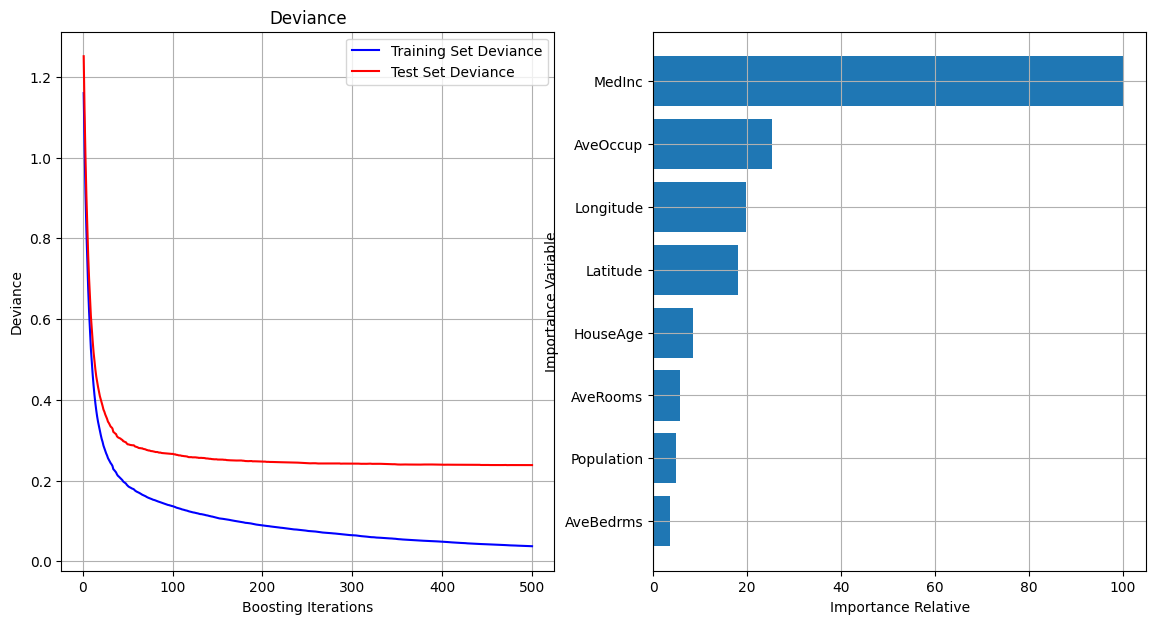

In [745]:

print(f'Test Accuracy Score: {reg.score(x_test,y_test)}')
mse=mean_squared_error(y_test,reg.predict(x_test))
print('Test MSE: %s'%mse)

#######################################
#plot training and test deviance

test_score_=np.zeros((params['n_estimators']))

#compute test set deviance
for i,y_pred in enumerate(reg.staged_predict(x_test)):
    test_score_[i]=mean_squared_error(y_test,y_pred)
    
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(np.arange(params['n_estimators'])+1,reg.train_score_,'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators'])+1,test_score_,'r-',label='Test Set Deviance')
plt.title('Deviance')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.legend()
plt.grid(visible=True)

########################################
#plot feature importance

feature_importance=reg.feature_importances_

#make importances relative to max importance
feature_importance= feature_importance / feature_importance.max() * 100

sorted_idx=np.argsort(feature_importance)
pos=np.arange(feature_importance.shape[0])

plt.subplot(1,2,2)
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,np.array(california.feature_names)[sorted_idx])
plt.xlabel('Importance Relative')
plt.ylabel('Importance Variable')
plt.grid(visible=True)


In [414]:
x.shape

(20640, 8)

In [415]:
y.shape

(20640,)

In [416]:
pd.DataFrame(x,columns=california.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.4044,34.0,5.478632,1.079772,1101.0,3.136752,35.500000,-119.279999
1,2.5750,40.0,4.329597,1.006727,1367.0,3.065022,34.080002,-118.129997
2,4.5096,30.0,5.165049,0.993528,845.0,2.734628,33.939999,-117.940002
3,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.209999,-117.790001
4,3.7727,47.0,4.536082,0.890034,653.0,2.243986,34.009998,-118.330002
...,...,...,...,...,...,...,...,...
20635,4.0125,20.0,5.538226,1.076453,1191.0,3.642202,37.810001,-121.220001
20636,2.2130,22.0,4.358178,1.078675,781.0,1.616977,38.000000,-121.320000
20637,2.8106,24.0,4.886584,1.024896,1496.0,2.069156,38.650002,-121.330002
20638,3.9784,18.0,4.718954,1.009150,2899.0,3.789542,34.070000,-117.779999


In [417]:
pd.DataFrame(y).describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [418]:
type(x[0,0])

numpy.float32

In [419]:
type(x.astype(np.float32)[0,0])

numpy.float32

In [420]:
offset

14447

In [536]:
np.zeros((params['n_estimators'],)).shape

(100,)

In [459]:
yp=reg.staged_predict(x_test)

In [498]:
test_score.shape

(100,)

In [535]:
np.asmatrix(list(reg.staged_predict(x_test))).shape

(100, 300)

In [554]:
np.arange(params['n_estimators'])+1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [553]:
reg.train_score_.shape

(100,)

In [569]:
reg.train_score_.min()

0.12171309569460063

In [811]:
test_score_.min()

0.23832944800734118

In [582]:
reg.feature_importances_.shape

(8,)

In [584]:
feature_importance

array([100.        ,   8.76774843,   4.32066413,   1.04625599,
         4.27888238,  21.97279833,  10.47375288,  13.31107912])

In [585]:
reg.feature_importances_

array([0.60912031, 0.05340614, 0.02631804, 0.00637296, 0.02606354,
       0.13384078, 0.06379776, 0.08108049])

In [600]:
np.sort(feature_importance)

array([  1.04625599,   4.27888238,   4.32066413,   8.76774843,
        10.47375288,  13.31107912,  21.97279833, 100.        ])

In [587]:
np.argsort(feature_importance)

array([3, 4, 2, 1, 6, 7, 5, 0])

In [612]:
feature_importance.shape[0]

8

In [673]:
pos

array([0, 1, 2, 3, 4, 5, 6, 7])

In [615]:
feature_importance[sorted_idx]

array([  1.04625599,   4.27888238,   4.32066413,   8.76774843,
        10.47375288,  13.31107912,  21.97279833, 100.        ])

In [640]:
sorted_idx

array([3, 4, 2, 1, 6, 7, 5, 0])

In [661]:
np.array(california.feature_names)[sorted_idx]

array(['AveBedrms', 'Population', 'AveRooms', 'HouseAge', 'Latitude',
       'Longitude', 'AveOccup', 'MedInc'], dtype='<U10')

In [647]:
sorted_idx.astype(int)

array([3, 4, 2, 1, 6, 7, 5, 0])

      Iter       Train Loss   Remaining Time 
         1           1.3023            6.74s
         2           1.2165            5.77s
         3           1.1318            5.25s
         4           1.0422            5.06s
         5           0.9523            4.95s
         6           0.8576            4.84s
         7           0.7773            4.74s
         8           0.7417            4.63s
         9           0.7126            4.64s
        10           0.6804            4.67s
        20           0.4582            3.99s
        30           0.3490            3.81s
        40           0.2751            3.10s
        50           0.2318            2.62s
        60           0.2016            2.06s
        70           0.1770            1.49s
        80           0.1590            0.99s
        90           0.1436            0.48s
       100           0.1295            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3707            4.18s
        

Text(0.5, 1.0, 'Influence of Parameters on Deviance')

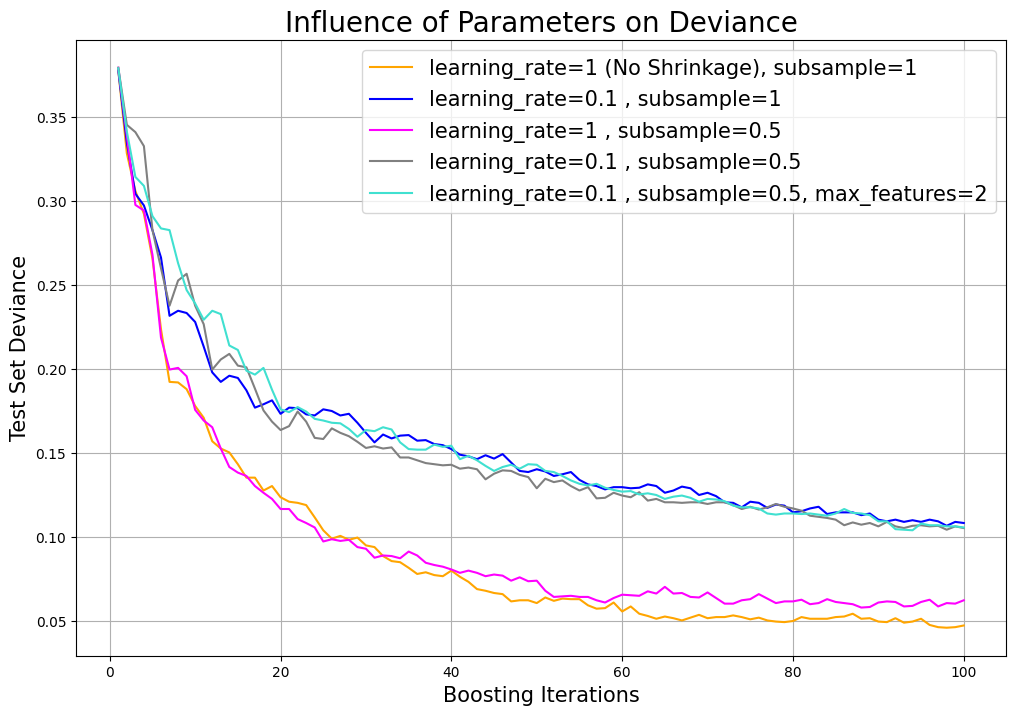

In [849]:
#shrinkage(via learning rate) and subsampling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier

x,y=make_hastie_10_2(10000,random_state=56)
#x=x.astype(np.float16)

#map labels from {-1,1} to {0,1}
#y_labels,y= np.unique(y,return_inverse=True)
y[y==-1]=0

offset=int(x.shape[0]*0.7)
x_train,x_test=x[:offset], x[offset:]
y_train,y_test=y[:offset], y[offset:]

params={'n_estimators':100, 'max_depth':None, 'min_samples_split':5, 'max_leaf_nodes':4, 'random_state':57}

plt.figure(figsize=(12,8))

for label,color,parameters in [
    ('learning_rate=1 (No Shrinkage), subsample=1', 'orange', {'learning_rate':1, 'subsample':1}),
    ('learning_rate=0.1 , subsample=1', 'blue', {'learning_rate':0.1, 'subsample':1}),
    ('learning_rate=1 , subsample=0.5', 'magenta', {'learning_rate':1, 'subsample':0.5}),
    ('learning_rate=0.1 , subsample=0.5', 'gray', {'learning_rate':0.1, 'subsample':0.5}),
    ('learning_rate=0.1 , subsample=0.5, max_features=2', 'turquoise', {'learning_rate':0.1, 'max_features':2})
]:
    params.update(parameters)
    
    clf=GradientBoostingClassifier(**params,verbose=True).fit(x_train,y_train)
    
    #compute test set deviance
    test_deviance=np.zeros(params['n_estimators'],)
    
    for i,y_pred in enumerate(clf.staged_predict(x_test)):
        test_deviance[i]=mean_squared_error(y_test,y_pred)
    
    plt.plot(np.arange(test_score_.shape[0])+1, test_deviance, c=color, label=label)
    
plt.grid()
plt.legend(fontsize=15)
plt.xlabel('Boosting Iterations',fontsize=15)
plt.ylabel('Test Set Deviance',fontsize=15)
plt.title('Influence of Parameters on Deviance',fontsize=20)    


In [794]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.007532,0.002012,0.001771,0.012782,-0.002058,-0.016083,0.012934,0.010037,-0.018772,0.006875
std,1.001287,0.994198,0.997322,0.994554,1.000168,0.997846,0.989858,0.992088,1.001298,1.002556
min,-3.733246,-3.859858,-3.818815,-3.684900,-3.714490,-4.122877,-3.667770,-3.490049,-4.344756,-3.659694
25%,-0.688293,-0.662218,-0.657013,-0.663215,-0.671896,-0.685145,-0.643272,-0.661326,-0.697759,-0.678991
50%,-0.016855,0.000354,0.000888,0.025504,-0.005875,-0.019809,0.017672,0.000792,-0.031027,0.012331
75%,0.662281,0.679185,0.665781,0.686645,0.669607,0.649206,0.670666,0.680957,0.665548,0.686153
max,3.843170,4.205232,4.047051,4.216236,3.492932,3.391552,3.608414,3.746911,3.576748,3.613745


In [795]:
pd.DataFrame(y).describe()

,0
count,10000.000000
mean,0.492000
std,0.499961
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [796]:
pd.DataFrame(y).value_counts()

0  
0.0    5080
1.0    4920
Name: count, dtype: int64

In [798]:
dd={'a':1,'b':2}

In [799]:
dd.update({'c':3})

In [800]:
dd

{'a': 1, 'b': 2, 'c': 3}

In [808]:
params

{'n_estimators': 1000,
 'max_depth': None,
 'min_samples_split': 5,
 'max_leaf_nodes': 4,
 'random_state': 57,
 'learning_rate': 0.1,
 'subsample': 0.5,
 'max_features': 2}

In [816]:
x_test.shape

(3000, 10)

In [817]:
y_test.shape

(3000,)

In [850]:
len(list(clf.staged_predict(x_test)))

100

In [851]:
len(list(clf.staged_predict(x_test))[0])

3000

In [854]:
clf.oob_score_

0.7158395744860787

In [856]:
clf.oob_scores_.shape

(100,)

In [858]:
clf.oob_improvement_.shape

(100,)

In [862]:
#feature importance

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

x,y=make_hastie_10_2(random_state=59)
clf=GradientBoostingClassifier(n_estimators=100,learning_rate=1,subsample=1,max_depth=1,random_state=59,verbose=1).fit(x,y)

clf.feature_importances_

      Iter       Train Loss   Remaining Time 
         1           1.3593            3.71s
         2           1.3327            3.23s
         3           1.3050            3.14s
         4           1.2778            3.00s
         5           1.2499            2.93s
         6           1.2225            2.91s
         7           1.1942            2.94s
         8           1.1673            2.96s
         9           1.1381            2.96s
        10           1.1102            2.95s
        20           0.8192            2.56s
        30           0.7150            2.05s
        40           0.6211            1.75s
        50           0.5418            1.62s
        60           0.4717            1.25s
        70           0.4308            0.90s
        80           0.3981            0.60s
        90           0.3697            0.30s
       100           0.3461            0.00s


array([0.10049571, 0.09865224, 0.09866126, 0.10040474, 0.08988911,
       0.10792547, 0.0986785 , 0.09378287, 0.11280005, 0.09871005])

In [920]:
#Stacked Generalization

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

x,y=fetch_california_housing(return_X_y=True)
x=x[:3000]
y=y[:3000]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)

estimators=[('lasso',LassoCV(random_state=60)),('ridge',RidgeCV()),('svm',SVR(C=1,gamma=.000001))]

reg=StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(random_state=60,verbose=1),verbose=1)
reg.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7733            0.34s
         2           0.6694            0.34s
         3           0.5854            0.33s
         4           0.5166            0.32s
         5           0.4611            0.32s
         6           0.4157            0.31s
         7           0.3786            0.31s
         8           0.3485            0.30s
         9           0.3236            0.30s
        10           0.3030            0.30s
        20           0.2167            0.27s
        30           0.1965            0.23s
        40           0.1877            0.21s
        50           0.1811            0.18s
        60           0.1763            0.15s
        70           0.1716            0.12s
        80           0.1671            0.08s
        90           0.1632            0.04s
       100           0.1582            0.00s


StackingRegressor(estimators=[('lasso', LassoCV(random_state=60)),
                              ('ridge', RidgeCV()),
                              ('svm', SVR(C=1, gamma=1e-06))],
                  final_estimator=GradientBoostingRegressor(random_state=60,
                                                            verbose=1),
                  verbose=1)

In [923]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

y_pred=reg.predict(x_test)
print('R2 Score: {}'.format(r2_score(y_test,y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {}'.format(root_mean_squared_error(y_test,y_pred)))

R2 Score: 0.7652380906196549
MAE: 0.32047934047238485
MSE: 0.22531088129741156
RMSE: 0.4746692335694526


In [927]:
0.22531088129741156**(1/2)

0.4746692335694526

In [925]:
36**(1/2)

6.0

In [945]:
0.000025**(1/2)

0.005

In [951]:
reg.predict(x_test[:5])

array([4.756573  , 1.27675404, 2.93867608, 1.35531257, 0.91336782])

In [947]:
reg.transform(x_test[:5])

array([[4.00248134, 4.07505245, 1.52814681],
       [1.27092341, 1.39927987, 1.29023062],
       [2.61128328, 2.77440421, 1.20086438],
       [1.48993662, 1.51103365, 1.35292033],
       [1.19438506, 1.07463084, 1.18491976]])